In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matlplotlib inline

import warnings
warnings.filterwarnings("ignore")

UsageError: Line magic function `%matlplotlib` not found.


In [4]:
df=pd.read_csv('advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.shape

(200, 5)

In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [12]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

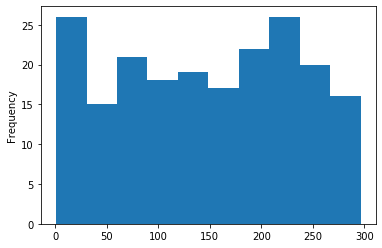

In [13]:
df['TV'].plot.hist()

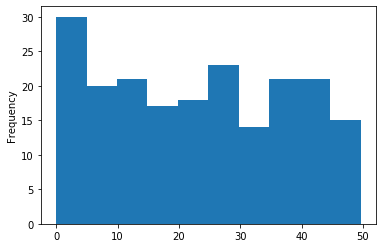

In [14]:
df['radio'].plot.hist()

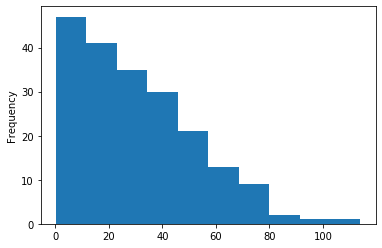

In [15]:
df['newspaper'].plot.hist()

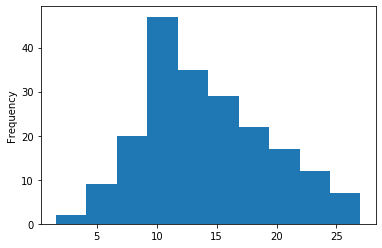

In [16]:
df['sales'].plot.hist()

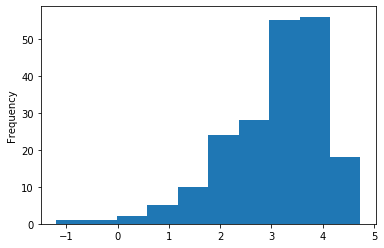

In [17]:
np.log(df['newspaper']).plot.hist()

In [18]:
df['newspaper']=np.log(df['newspaper'])

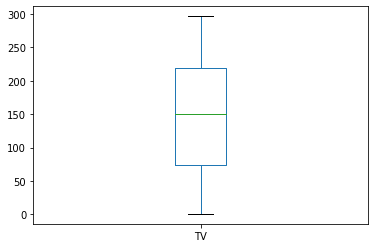

In [19]:
df['TV'].plot.box()

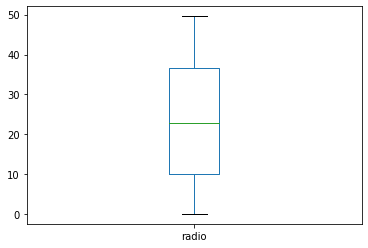

In [20]:
df['radio'].plot.box()

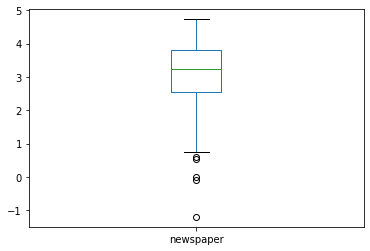

In [21]:
df['newspaper'].plot.box()

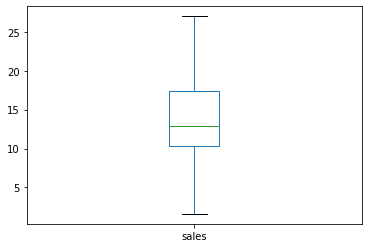

In [22]:
df['sales'].plot.box()

In [23]:
Q1=df['newspaper'].quantile(0.25)
Q2=df['newspaper'].quantile(0.50)
Q3=df['newspaper'].quantile(0.75)
Q4=df['newspaper'].quantile(1)

In [24]:


print("First Quartile",Q1)
print("Second Quartile",Q2)
print("Third Quartile",Q3)
print("Fourth Quartile",Q4)

First Quartile 2.5455080816835367
Second Quartile 3.2484176600955044
Third Quartile 3.8088822465086327
Fourth Quartile 4.736198448394496


In [25]:
IQR=Q3-Q1
print(IQR)

1.263374164825096


In [26]:
LR=Q1-1.5*IQR
UR=Q3+1.5*IQR

In [27]:
LR,UR

(0.6504468344458927, 5.7039434937462765)

In [28]:
df.loc[df['newspaper']<LR,'newspaper']=np.mean(df['newspaper'])

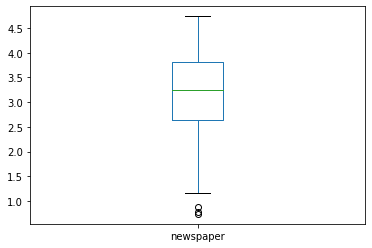

In [29]:
df['newspaper'].plot.box()

In [30]:
df['newspaper']

0      4.237001
1      3.808882
2      4.238445
3      4.069027
4      4.067316
         ...   
195    2.624669
196    2.091864
197    1.856298
198    4.192680
199    2.163323
Name: newspaper, Length: 200, dtype: float64

In [31]:
df.loc[df['newspaper']>UR,'newspaper']=np.mean(df['newspaper'])

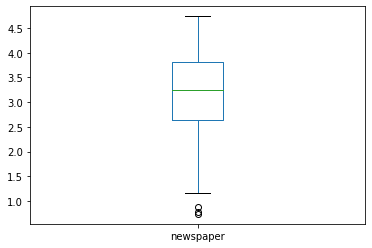

In [32]:
df['newspaper'].plot.box()

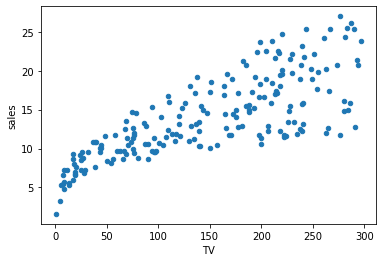

In [33]:
df.plot.scatter('TV','sales')

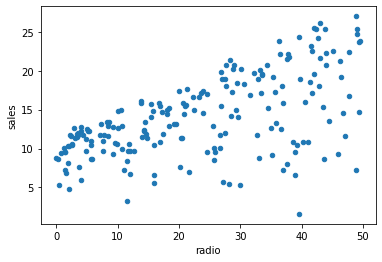

In [34]:
df.plot.scatter('radio','sales')

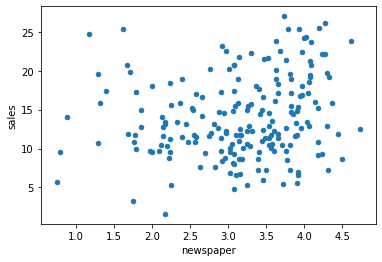

In [35]:
df.plot.scatter('newspaper','sales')

In [36]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.196338,-0.051616
TV,0.017715,1.000000,0.054809,0.049205,0.782224
radio,-0.110680,0.054809,1.000000,0.254034,0.576223
newspaper,-0.196338,0.049205,0.254034,1.000000,0.183871
sales,-0.051616,0.782224,0.576223,0.183871,1.000000


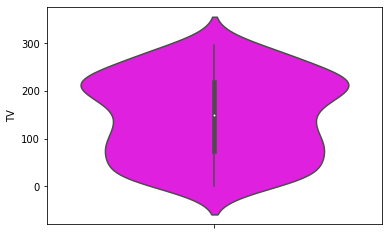

In [37]:
sns.violinplot(df['TV'],orient='vertical',color='magenta')

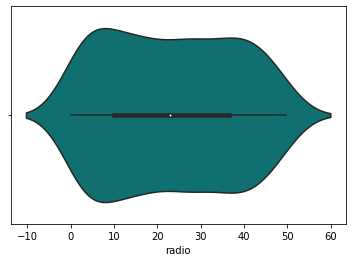

In [38]:
sns.violinplot(df['radio'],orient='horizontal',color='teal')

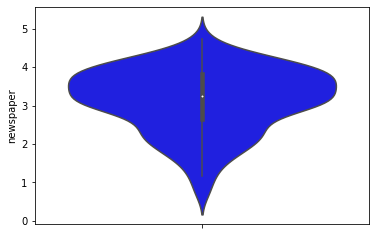

In [39]:
sns.violinplot(df['newspaper'],orient='vertical',color='Blue')

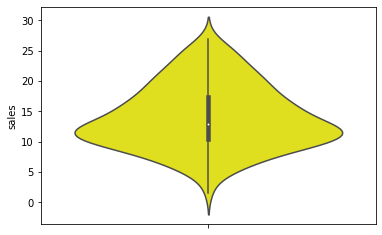

In [40]:
sns.violinplot(df['sales'],orient='vertical',color='yellow')

In [41]:
x=df.drop(['sales'],axis=1)
y=df['sales']
x.shape,y.shape

((200, 4), (200,))

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [43]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [44]:
x.head()

,Unnamed: 0,TV,radio,newspaper
0,0.000000,0.775786,0.762097,0.875021
1,0.005025,0.148123,0.792339,0.767838
2,0.010050,0.055800,0.925403,0.875383
3,0.015075,0.509976,0.832661,0.832967
4,0.020101,0.609063,0.217742,0.832539


In [45]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=56)

In [46]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [47]:
reg=KNN(n_neighbors=12)
reg.fit(train_x,train_y)
test_predict=reg.predict(test_x)
k=mse(test_predict,test_y)
print('Test MSE  ', k )

Test MSE   2.5354222222222207


In [48]:
def Elbow(K):
    test_mse=[]
    for i in K:
        reg=KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        tmp=reg.predict(test_x)
        tmp=mse(tmp,test_y)
        test_mse.append(tmp)
        return test_mse

In [49]:
k=range(1,40)

In [50]:
test=Elbow(k)

In [51]:
test

[3.2248000000000006]

ValueError: x and y must have same first dimension, but have shapes (39,) and (1,)

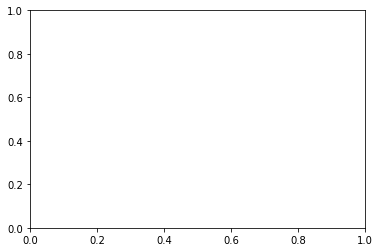

In [52]:
plt.plot(k,test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [53]:
#Visualizing overfitting and underfitting using KNN

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import r2_score

In [54]:
clf=KNN(n_neighbors=2)
clf.fit(train_x,train_y)
train_predict=clf.predict(train_x)
k=r2_score(train_predict,train_y)
print("Training r2 Score "    ,  k )
test_predict=clf.predict(test_x)
k=r2_score(test_predict,test_y)
print("Test r2 score ",   k )

Training r2 Score  0.9593346601590612
Test r2 score  0.8398221644666102


In [55]:
#Checking the Training r2 score and Test r2 score curve

def r2score(K):
    train_r2=[]
    test_r2=[]
    for i in K:
        clf=KNN(n_neighbors=i)
        clf.fit(train_x,train_y)
        tmp=clf.predict(train_x)
        tmp=r2_score(tmp,train_y)
        train_r2.append(tmp)
        tmp=clf.predict(test_x)
        tmp=r2_score(tmp,test_y)
        test_r2.append(tmp)
        
        return train_r2,test_r2
        

In [56]:
k=range(1,150)

In [57]:
train_r2,test_r2=r2score(k)

In [58]:
score=pd.DataFrame({'train_score':train_r2,'test_score':test_r2},index=k)
score

,train_score,test_score
1,1.0,0.858562
2,1.0,0.858562
3,1.0,0.858562
4,1.0,0.858562
5,1.0,0.858562
...,...,...
145,1.0,0.858562
146,1.0,0.858562
147,1.0,0.858562
148,1.0,0.858562


ValueError: x and y must have same first dimension, but have shapes (149,) and (1,)

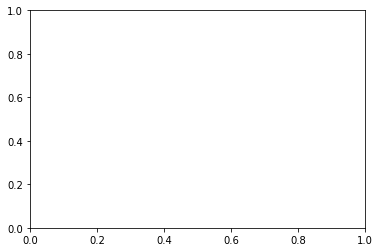

In [59]:
#Visualizing

plt.plot(k,test_r2,color='red',label='test')
plt.plot(k,train_r2,color='green',label='train')
plt.xlabel('K Neighbors')
plt.ylabel('R2 Score')
plt.title('R2 Curve')
plt.ylim(0.4,1)
plt.legend()

In [60]:
#Using K-Fold Cross Validation to prevent overfitting and underfitting

from sklearn.model_selection import cross_val_score
score=cross_val_score(KNN(n_neighbors=8), X=train_x,y=train_y,cv=10)

In [61]:
score.mean()*100,score.std()*100

(88.14882261140937, 3.7579149700030423)

In [62]:
def Val_score(n_neighbors):
    avg=[]
    std=[]
    for i in n_neighbors:
        score=cross_val_score(KNN(n_neighbors=i),X=train_x,y=train_y,cv=10)
        avg.append(score.mean())
        std.append(score.std())
        return avg, std

In [63]:
n_neighbors=range(1,50)
mean,std=Val_score(n_neighbors)

ValueError: x and y must have same first dimension, but have shapes (49,) and (1,)

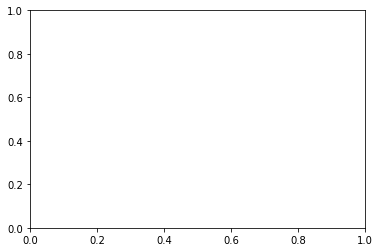

In [64]:
plt.plot(n_neighbors,mean,color='green',label='mean')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

ValueError: x and y must have same first dimension, but have shapes (49,) and (1,)

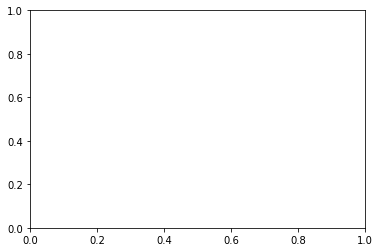

In [65]:
#plotting standard deviation validation for each value of K

plt.plot(n_neighbors,std,color='red',label='Standard deviation')
plt.xlable('n_neighbors')
plt.ylabel('std dev')
plt.title('Standard deviation of Validation score')

In [66]:
#Trying the optimal model over test set
#using n neighbors = 8

clf=KNN(n_neighbors=8)
clf.fit(train_x,train_y)
score1=clf.score(train_x,train_y)
score=clf.score(test_x,test_y)
score,score1

(0.8850686489236193, 0.9145232357573109)

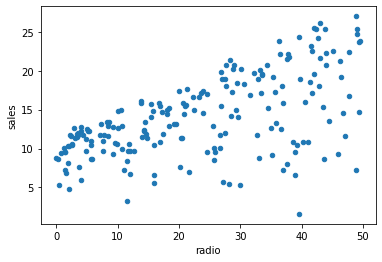

In [67]:
df.plot.scatter('radio','sales')

In [68]:
a=np.log(df['radio'])
a

C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      3.632309
1      3.671225
2      3.826465
3      3.720862
4      2.379546
         ...   
195    1.308333
196    1.589235
197    2.230014
198    3.737670
199    2.151762
Name: radio, Length: 200, dtype: float64

In [69]:
b=df['radio']
b

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: radio, Length: 200, dtype: float64

In [70]:
c=df['sales']

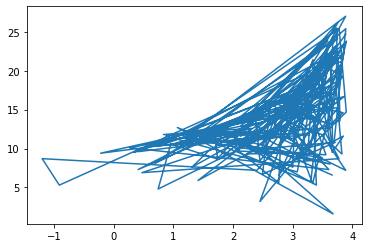

In [71]:
plt.plot(a,c)

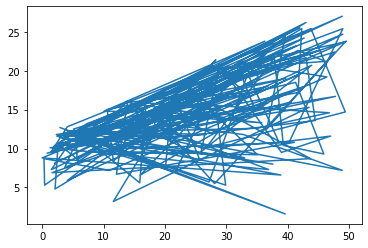

In [72]:
plt.plot(b,c)

In [74]:
#Since there is no linear relationship between the input variables and target variable, we will not apply linear model(Linear Regression). It doesn't satisfy the assumptions of linear model.
#Applying Decision Tree Model



In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
data=pd.read_csv('advertising.csv')

In [82]:
data.shape

(200, 5)

In [84]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [85]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [87]:
A=data.drop(['sales'],axis=1)
B=data['sales']

In [89]:
from sklearn.model_selection import train_test_split

In [93]:
A_train,A_valid,B_train,B_valid=train_test_split(A,B,random_state=101,test_size=0.25)

In [94]:
A_train.shape,B_train.shape

((150, 4), (150,))

In [95]:
A_valid.shape,B_valid.shape

((50, 4), (50,))

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
dt_model=DecisionTreeRegressor(random_state=10)

In [98]:
dt_model.fit(A_train,B_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

In [99]:
dt_model.score(A_train,B_train)

1.0

In [100]:
dt_model.score(A_valid,B_valid)

0.9434950669457359

In [101]:
dt_model.predict(A_valid)

array([12.6, 17.4, 13.2, 16. ,  9.5,  6.7, 20.8, 17.4, 10.1, 19.7, 10.8,
       15.5, 12.2, 20.7, 16.9, 10.1, 12.7,  9.4,  9.9, 22.1,  8. , 18. ,
       25.5, 25.4,  9.7, 11. , 21.4,  9.7, 14.9,  8.5,  8.5, 19.7, 11.7,
        7.2, 18.3,  8.7,  9.9,  8.8,  5.7, 10.1, 13.6, 10.1, 11.5,  8. ,
       12. , 11.3,  1.6, 15.7, 15.2, 20.7])

In [104]:
B_pred=dt_model.predict(A_valid)

In [106]:
from sklearn.metrics import r2_score

In [110]:
r2_score(B_valid,B_pred)

0.9434950669457358

In [113]:
#changing the max_depth

train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
    dt_model=DecisionTreeRegressor(max_depth=depth,random_state=10)
    dt_model.fit(A_train,B_train)
    train_accuracy.append(dt_model.score(A_train,B_train))
    validation_accuracy.append(dt_model.score(A_valid,B_valid))

In [115]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.476288,0.450266
1,2,0.800952,0.792002
2,3,0.905019,0.847542
3,4,0.959543,0.887559
4,5,0.982686,0.931302


No handles with labels found to put in legend.


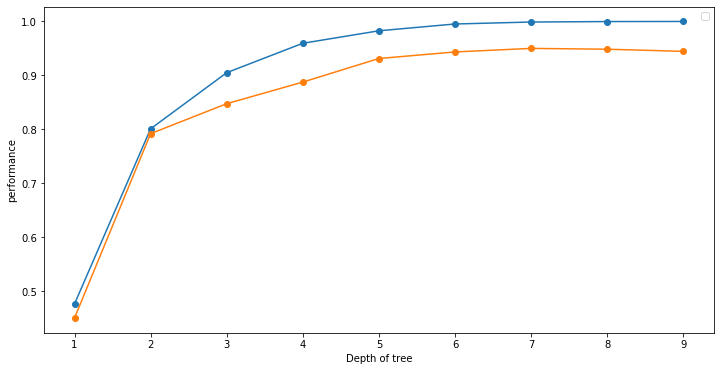

In [118]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o')
plt.plot(frame['max_depth'],frame['valid_acc'],marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()



In [119]:
dt_model=DecisionTreeRegressor(max_depth=8,max_leaf_nodes=25,random_state=10)

In [120]:
dt_model.fit(A_train,B_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=25, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

In [121]:
dt_model.score(A_train,B_train)

0.9833647520418961

In [122]:
dt_model.score(A_valid,B_valid)

0.9406073598268262

In [123]:
from sklearn import tree

In [125]:
!pip install graphviz

  ERROR: Could not find a version that satisfies the requirement graphviz (from versions: none)
ERROR: No matching distribution found for graphviz


In [127]:
decision_tree=tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=A_train.columns,max_depth=2,filled=True)

In [128]:
!dot -Tpng tree.dot -o tree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [129]:
image=plt.imread('tree.png')
plt.figure(figsize=(15,25))
plt.imshow(image)

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

In [ ]:
score of KNN model is 0.8850686489236193 and score of DecisionTree model is 0.9406073598268262. Hence we will opt for DecisionTreeRegressor model for predictions on any unseen data.
